# Proyek Analisis Data: Bike Sharing
* Nama: Wahyu Adji Agus Saputra
* Email: ranggaldrian143@gmail.com
* ID Dicoding: rynikz

## Menentukan Pertanyaan Bisnis
* Perbedaan rental sepeda pada registered dan casual user berdasarkan bulan
* Bagaimana suhu, kelembapan dan kecepatan angin dalam setiap bulannya
* Pengaruh cuaca dalam jumlah rental sepeda berdasarkan musim

## Import Packages dan Library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

In [7]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight:
 * Dari 2 dataset yang dikumpulkan dapat diperoleh informasi bahwa pada dataset hour.csv terdapat kolom tambahan yaitu hr, yaitu satuan jam mulai dari 0 sampai 23
 * Terdapat kesamaan variabel waktu dari 2 dataset seperti season, yr(year), mnth(month), holiday, weekday dan workingday. Perbedaan hanya pada hr (hour)
 * Variabel seperti weathersit (cuaca), temp (suhu), atemp (Perkiraan suhu), hum (kelembaban), windspeed (kecepatan angin) juga terdapat pada 2 dataset
 * Terdapat data tentang registered, casual, dan total user (cnt)
    

## Assessing Data

### Day_df

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [15]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Hour_df

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [18]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [20]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Insight:
 * Dari 2 dataset tidak terdapat missing value
 * Tidak terdapat duplikasi data
    

## Cleaning Data

#### Mengganti Tipe data day_df

In [24]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengganti Tipe data hour_df

In [26]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Insight:
 * Mengubah tipe data dteday dari object menjadi datetime

## EDA

#### Perbedaan jumlah registered dan casual dalam 1 tahun

In [30]:
day_df.groupby(by="mnth").agg({
    "registered": "sum",
    "casual": "sum"
})

,registered,casual
mnth,,
1,122891,12042
2,136389,14963
3,184476,44444
4,208292,60802
5,256401,75285
6,272436,73906
7,266791,78157
8,279155,72039
9,275668,70323


#### Jumlah rental sepeda berdasarkan cuaca dalam setiap musim

In [32]:
day_df.groupby(by="season").agg({
    "weathersit": "max",
    "cnt": "sum"
})

,weathersit,cnt
season,,
1,3,471348
2,3,918589
3,3,1061129
4,3,841613


#### Mengelompokkan kategori suhu dalam satu bulan

In [34]:
agg_df = day_df.groupby(by="mnth").agg({
    "temp": ["min", "max", "mean"],
    "hum": ["min", "max", "mean"],
    "windspeed": ["min", "max", "mean"]
})

mean_temp = agg_df['temp']['mean']
coldest_month = mean_temp.idxmin()
coldest_temp = mean_temp.min()
print(agg_df)
print(f"\nBulan terdingin adalah bulan ke-{coldest_month} dengan suhu rata-rata {coldest_temp:.2f} derajat.")

          temp                           hum                     windspeed  \
           min       max      mean       min       max      mean       min   
mnth                                                                         
1     0.059130  0.425000  0.236444  0.311250  0.911250  0.585828  0.073396   
2     0.127500  0.521667  0.299226  0.187917  0.929167  0.567465  0.045408   
3     0.198333  0.601667  0.390539  0.000000  0.948261  0.588475  0.089558   
4     0.300000  0.664167  0.469999  0.254167  0.888333  0.588063  0.065929   
5     0.414167  0.775000  0.594798  0.360417  0.922500  0.688958  0.074637   
6     0.540833  0.834167  0.684097  0.305000  0.833333  0.575806  0.077125   
7     0.595833  0.861667  0.755470  0.396250  0.865417  0.597876  0.080850   
8     0.635833  0.793333  0.708582  0.415000  0.850000  0.637730  0.070283   
9     0.469167  0.753333  0.616485  0.467083  0.972500  0.714714  0.050379   
10    0.254167  0.657500  0.485012  0.463333  0.906250  0.693761

Insight:
 * Terdapat perbedaan yang signifikan antara jumlah casual user dan registered user dalam dataset
 * Cuaca mempengaruhi Jumlah rental sepeda, pada cuaca yang lebih cerah, jumlah sewa sepeda lebih besar dan pada cuaca yang lebih buruk, jumlah sewa menurun
 * Berdasarkan analisis suhu setiap bulannya dalam satu tahun, dapat diketahui bulan terdingin yaitu bulan ke- 1
    

## Visualization & Explanatory Analysis

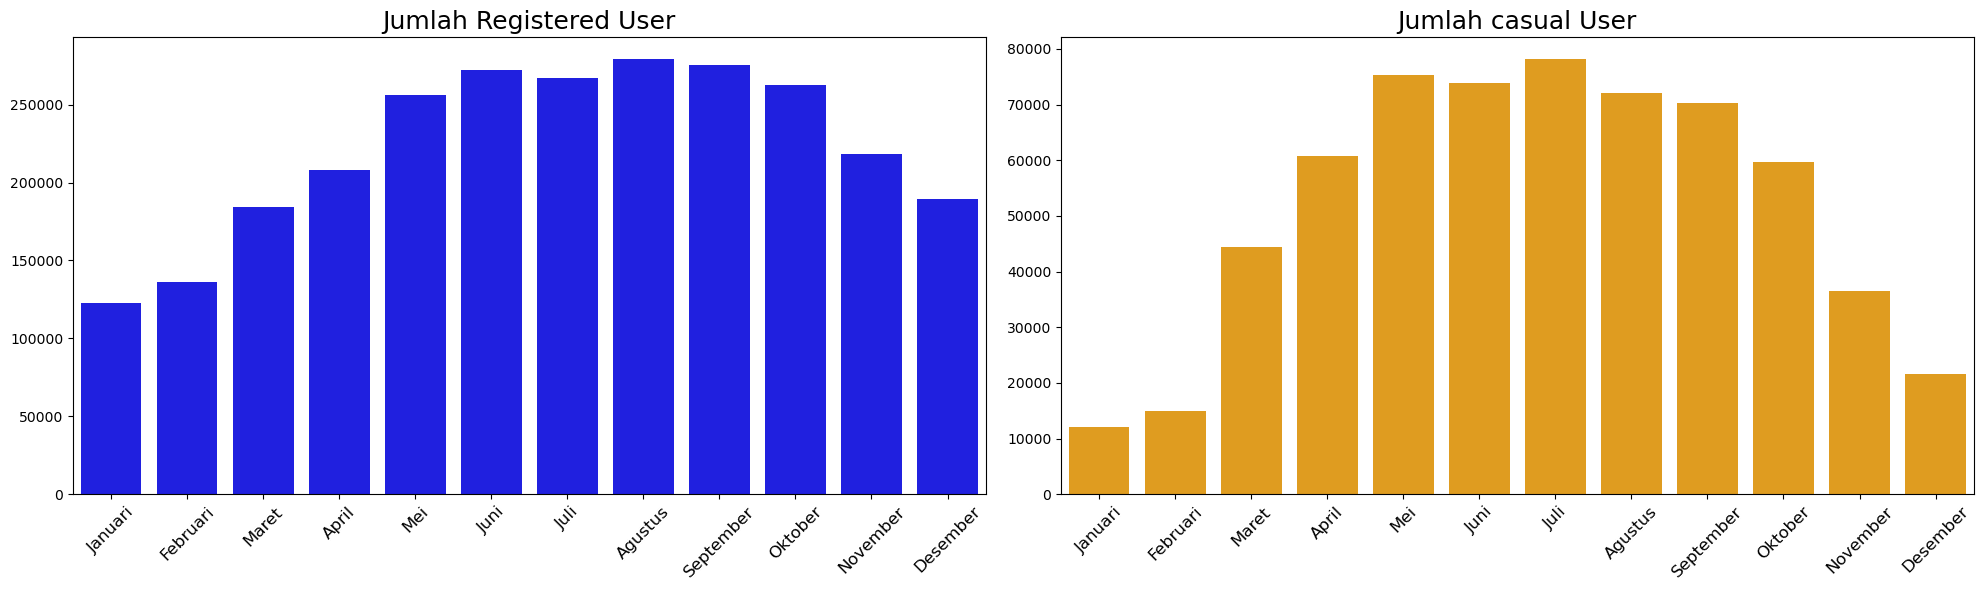

In [37]:
mnth_name = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}
day_df['mnth_name'] = day_df['mnth'].map(mnth_name)

registered_df = day_df.groupby(by="mnth_name").registered.sum().reset_index()
registered_df.rename(columns={"registered": "user_count"}, inplace=True)
registered_df['user_type'] = 'Registered'

casual_df = day_df.groupby(by="mnth_name").casual.sum().reset_index()
casual_df.rename(columns={"casual": "user_count"}, inplace=True)
casual_df['user_type'] = 'Casual'

ordered_months = [
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
]
registered_df['mnth_name'] = pd.Categorical(registered_df['mnth_name'], categories=ordered_months, ordered=True)
casual_df['mnth_name'] = pd.Categorical(casual_df['mnth_name'], categories=ordered_months, ordered=True)

registered_df = registered_df.sort_values('mnth_name')
casual_df = casual_df.sort_values('mnth_name')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.barplot(
    y="user_count",
    x="mnth_name",
    data=registered_df,
    color="blue", 
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Jumlah Registered User", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12, rotation=45)


sns.barplot(
    y="user_count",
    x="mnth_name",
    data=casual_df,
    color="orange", 
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Jumlah casual User", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12, rotation=45)
plt.tight_layout()
plt.show()

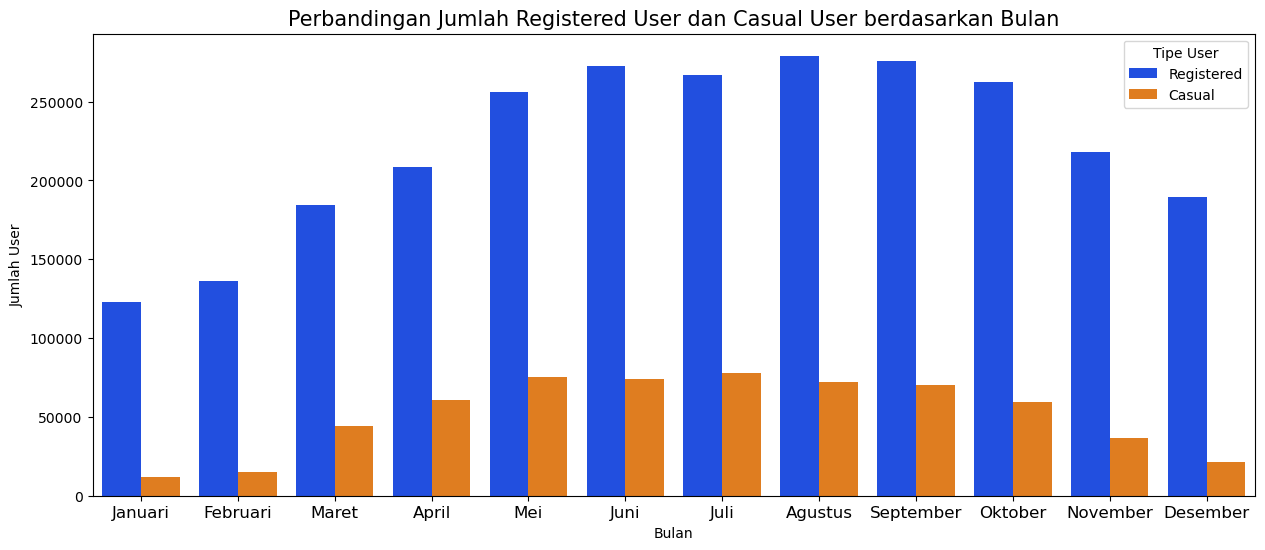

In [38]:
combined_df = pd.concat([registered_df, casual_df])
ordered_months = [
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
]
combined_df['mnth_name'] = pd.Categorical(combined_df['mnth_name'], categories=ordered_months, ordered=True)
combined_df = combined_df.sort_values('mnth_name')

plt.figure(figsize=(15, 6))
sns.barplot(
    x="mnth_name",
    y="user_count",
    hue="user_type",
    data=combined_df,
    palette = 'bright'
)
plt.title("Perbandingan Jumlah Registered User dan Casual User berdasarkan Bulan", loc="center", fontsize=15)
plt.ylabel("Jumlah User")
plt.xlabel("Bulan")
plt.tick_params(axis='x', labelsize=12)
plt.legend(title="Tipe User")
plt.show()

## Pertanyaan 2:

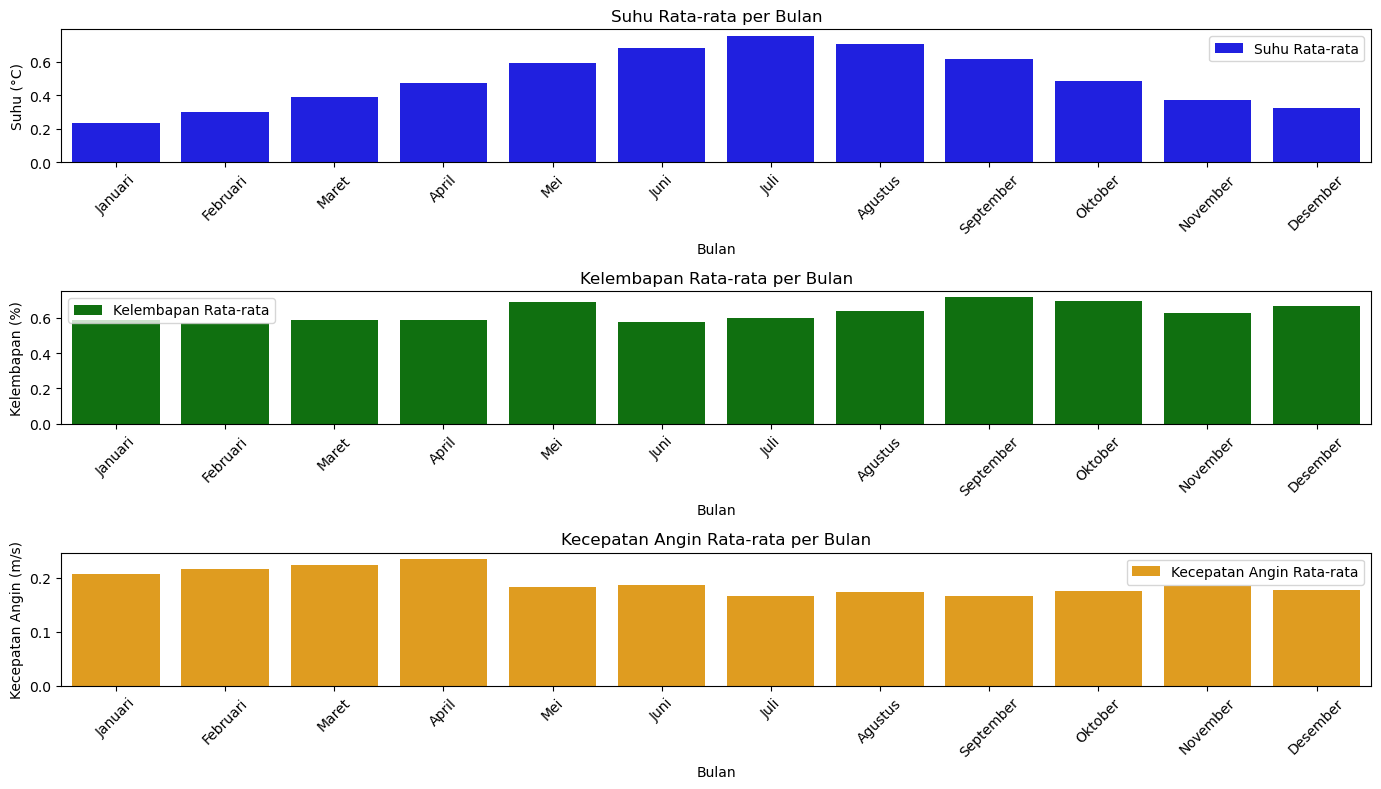

In [40]:
agg_df = day_df.groupby(by="mnth").agg({
    "temp": ["min", "max", "mean"],
    "hum": ["min", "max", "mean"],
    "windspeed": ["min", "max", "mean"]
})

agg_df.columns = ['Temp Min', 'Temp Max', 'Temp Mean', 'Hum Min', 'Hum Max', 'Hum Mean', 'Wind Speed Min', 'Wind Speed Max', 'Wind Speed Mean']
agg_df.reset_index(inplace=True)

agg_df['mnth_name'] = agg_df['mnth'].map(mnth_name)
agg_df['mnth_name'] = pd.Categorical(agg_df['mnth_name'], categories=ordered_months, ordered=True)
agg_df = agg_df.sort_values('mnth_name')

plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
sns.barplot(x='mnth_name', y='Temp Mean', data=agg_df, color='blue', label='Suhu Rata-rata')
plt.title('Suhu Rata-rata per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Suhu (°C)')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(3, 1, 2)
sns.barplot(x='mnth_name', y='Hum Mean', data=agg_df, color='green', label='Kelembapan Rata-rata')
plt.title('Kelembapan Rata-rata per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Kelembapan (%)')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(3, 1, 3)
sns.barplot(x='mnth_name', y='Wind Speed Mean', data=agg_df, color='orange', label='Kecepatan Angin Rata-rata')
plt.title('Kecepatan Angin Rata-rata per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Kecepatan Angin (m/s)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## Pertanyaan 3:

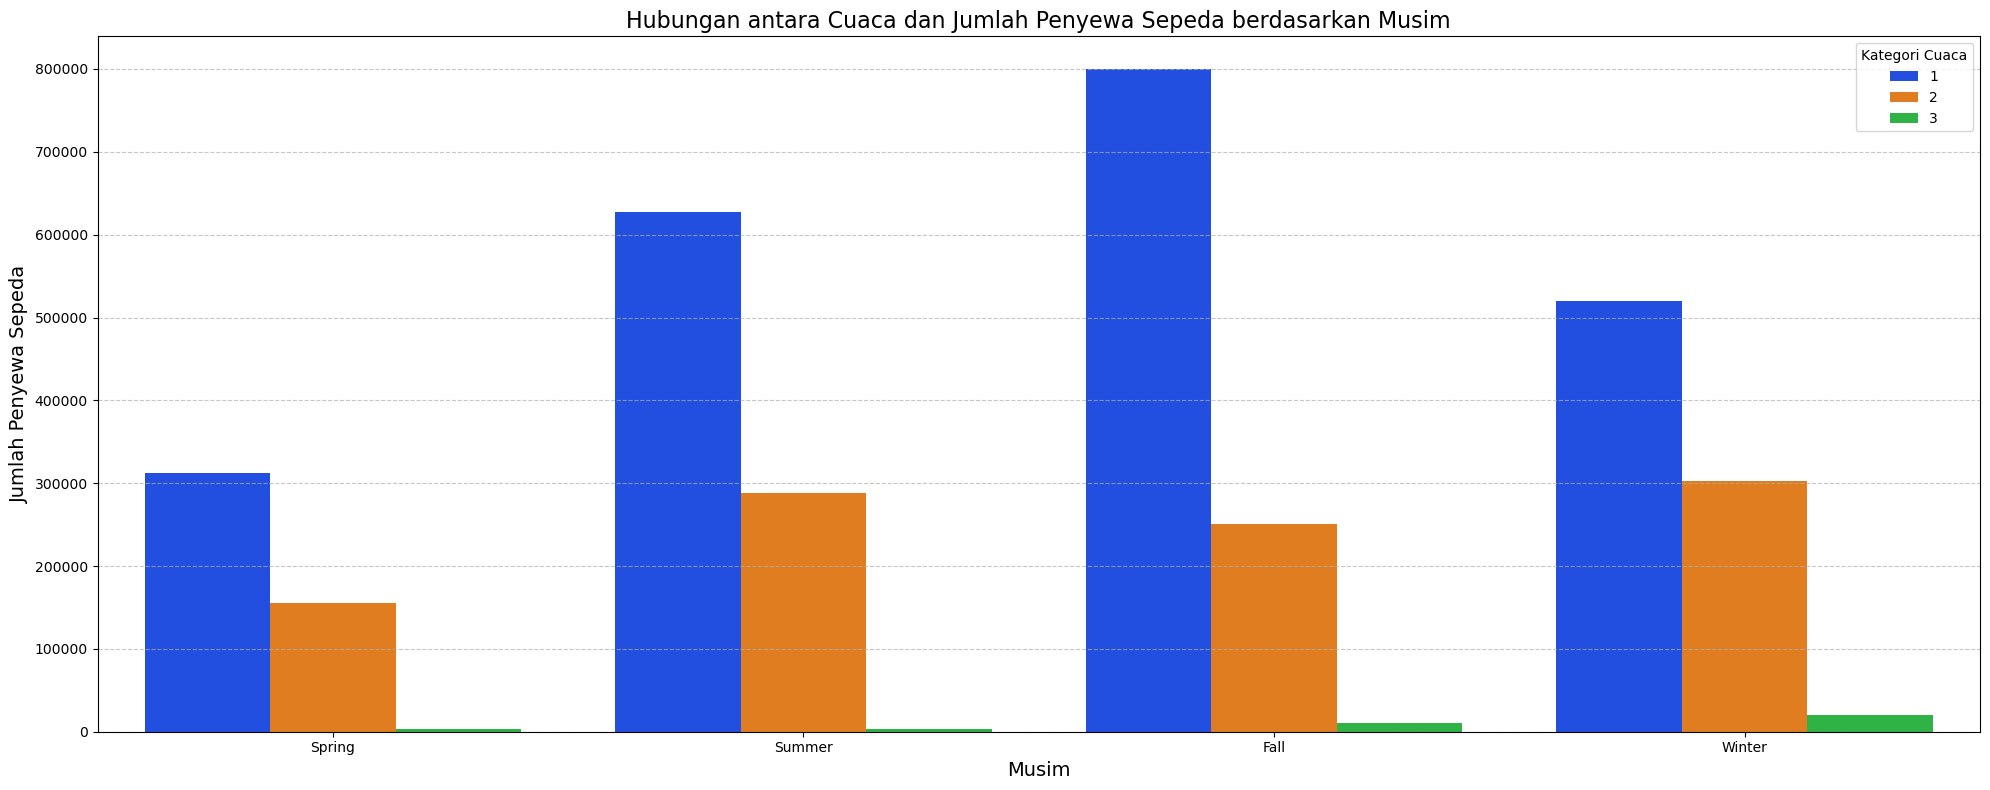

In [42]:
season_name = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
day_df['season_name'] = day_df['season'].map(season_name)
weather_season_df = day_df.groupby(by=["season_name", "weathersit"]).cnt.sum().reset_index()

ordered_season = [
    'Spring', 'Summer', 'Fall', 'Winter']
weather_season_df['season_name'] = pd.Categorical(weather_season_df['season_name'], categories=ordered_season, ordered=True)
weather_season_df = weather_season_df.sort_values('season_name')

plt.figure(figsize=(20, 8))
sns.barplot(
    x="season_name",
    y="cnt",
    hue="weathersit",
    data=weather_season_df,
    palette="bright",  # Palette warna
    order=ordered_season  # Urutan bulan
)
plt.title("Hubungan antara Cuaca dan Jumlah Penyewa Sepeda berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Jumlah Penyewa Sepeda", fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Kategori Cuaca") 
plt.tight_layout() 
plt.show()

Insight:
* Pada pertanyaan 1 yaitu :
       Jumlah registered user dan Casual user memiliki perbedaan yang cuckup signifikan, registered user ditunjukkan pada data berwarna biru, sedangkan casual berwarna orange. Terdapat perbedaan yang jauh dari kedua user tersebut.
    
 * Pada pertanyaan 2 yaitu :
        Setelah dianalisis secara berkelompok dapat diketahui nilai untuk masing masing kategori (suhu, kelembapan, dan kecepatan angin) untuk setiap bulannya.
 * Pada pertanyaan 3 yaitu :
       Cuaca mempengaruhi Jumlah rental sepeda, pada cuaca yang lebih cerah, jumlah sewa sepeda lebih besar dan pada cuaca yang lebih buruk, jumlah sewa menurun
    

## Conclusion

* conclusion pertanyaan 1:
  Berdasarkan data yang telah di analisis, dapat dilihat bahwa perbedaan antara registered user dan casual user dapat dilihat, dalam pertanyaan yang saya buat, saya menganalisis perbedaan jumlah user antara registered dan casual berdasarkan bulan. Dapat dilihat bahwa terjadi perbedaan yang sginifikan dari bulan ke bulan dalam satu tahun terhadap jumlah registered user dan casual user.
* Conclusion pertanyaan 2:
  Berdasarkan data diatas, dapat diketahui persebaran nilai suhu, kelembapan, dan kecepatan angin pada setiap bulannya. Dapat disimpulkan juga bulan terdingin ada pada bulan januari dan bulan terpanas pada bulan july.
* Conclusion pertanyaan 3:
  Berdasarkan data yang telah diolah dan dianalisis terdapat hubungan antara cuaca dan jumlah sewa sepeda tiap musim nya. Dapat dilihan bahwa saat cuaca kategori 3, yaitu salju ringan, hujan ringan disertai badai, jumlah sewa menurun drastis dibandingkan dengan kategori 1 dan 2.

In [46]:
day_df.to_csv("main_data.csv", index=False)